 #                                   Framingham Heart Study

In [31]:
import pandas as pd
heart = pd.read_csv('framingham.csv')

In [2]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

C:\Users\132004\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Data Cleaning

In [32]:
# To find no. of null entries in each column
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [33]:
#Removing the columns which have 90% missing data

thresh = len(heart)*0.1
heart.dropna(thresh=thresh,axis=1,inplace=True)

In [20]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [21]:
#Function for imputing the value for missing entries
def impute_median(series):
    return series.fillna(series.median())

In [70]:
heart['glucose']= heart['glucose'].transform(impute_median)
heart['education']= heart['education'].transform(impute_median)
heart['cigsPerDay']= heart['cigsPerDay'].transform(impute_median)
heart['BPMeds']= heart['BPMeds'].transform(impute_median)
heart['totChol']= heart['totChol'].transform(impute_median)
heart['heartRate']= heart['heartRate'].transform(impute_median)
heart['BMI']= heart['BMI'].transform(impute_median)

In [71]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
age_class          4240 non-null object
dtypes: float64(9), int64(7), object(1)
memory usage: 563.2+ KB


# EDA for the dataset

In [99]:
#Descriptive statistics of the dataset
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


0    3596
1     644
Name: TenYearCHD, dtype: int64


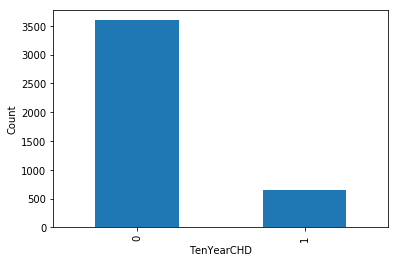

In [72]:
#To observe dist of "TenYearCHD" i.e. no. of people with risk of heart disease

heart['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
print(heart['TenYearCHD'].value_counts())

This implies the dataset is highly imbalanced.

Text(0.5,1,'Risk of heart disease')

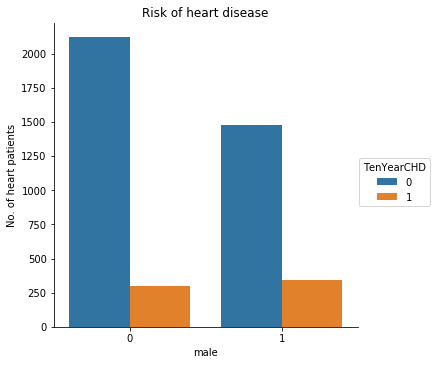

In [74]:
sns.factorplot(x='male',hue='TenYearCHD',data=heart,kind='count',size=5)
plt.ylabel('No. of heart patients')
plt.title('Risk of heart disease')

Males are at greater risk of CHD.

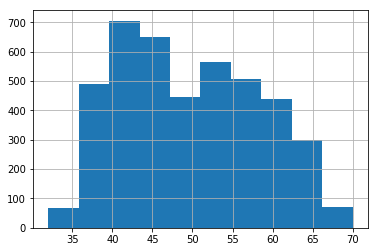

In [37]:
heart['age'].hist()

TenYearCHD
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

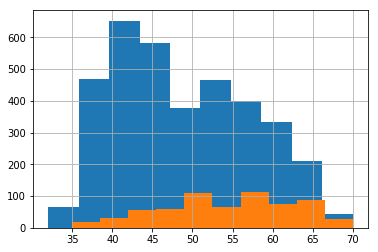

In [38]:
heart.groupby('TenYearCHD').age.hist()

In [75]:
# Function to classify people based on their age.
def classify_age(age):
    if(age<35):
        return ("Young")
    elif((age>=35) & (age<50)):
        return("Middle age(40-50)")
    elif((age>=50)& (age<60)):
        return("Post 50(50-60)")
    else:
        return("Old(>60)")

In [76]:
heart['age_class']= heart['age'].apply(classify_age)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_class
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,Middle age(40-50)
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,Middle age(40-50)
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,Middle age(40-50)
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,Old(>60)
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,Middle age(40-50)


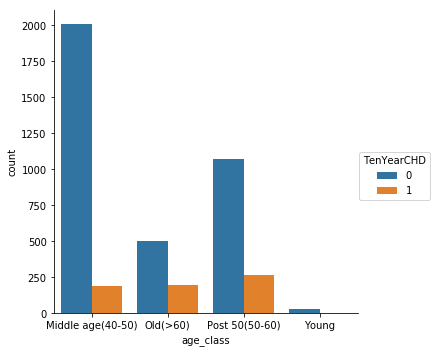

In [77]:
#Plot risk of heart disease for people in diff age group

#pd.crosstab(heart['age_class'],heart['TenYearCHD'],normalize=True).plot(kind='bar')
sns.factorplot(x="age_class",hue='TenYearCHD',data=heart,kind='count',size=5)

People older than 50 are more prone to CHD and people in age range of (50-60)are most vulnerable.

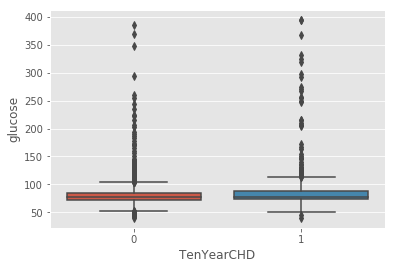

In [85]:
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='TenYearCHD',y='glucose',data=heart)

Glucose level of a person doesn't affect risk to Heart diseases.

TenYearCHD         0         1
diabetes                      
0           0.831840  0.142453
1           0.016274  0.009434


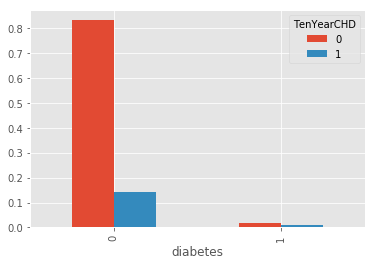

In [94]:
diab = pd.crosstab(heart['diabetes'],heart['TenYearCHD'],normalize=True)
print(diab)
diab.plot(kind='bar')
#sns.factorplot(x="diabetes",hue='TenYearCHD',data=heart,kind='count',size=5)

People with diabetes are at greater risk of Heart disease.

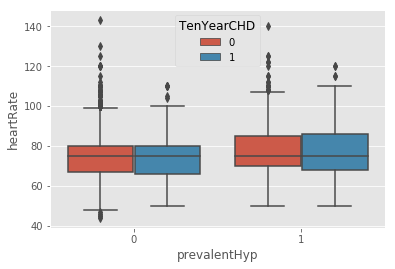

In [97]:
sns.boxplot(x="prevalentHyp", y="heartRate",hue="TenYearCHD",data=heart)

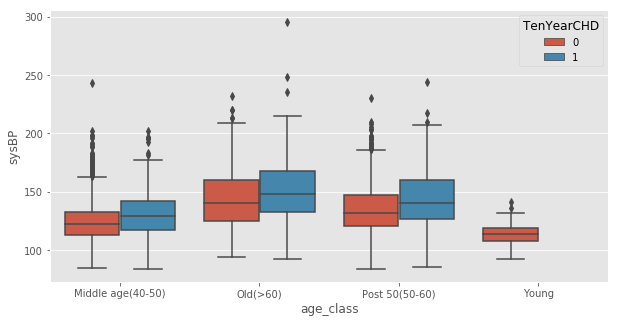

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot('age_class','sysBP', hue="TenYearCHD", data=heart)

For each age group, peopple with high "sysBP" are at greater risk of heart disease.

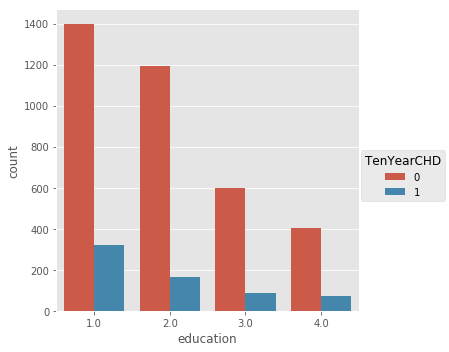

In [100]:
sns.factorplot(x="education",hue='TenYearCHD',data=heart,kind='count',size=5)

Education of a person doesn't affect risk to Heart diseases.

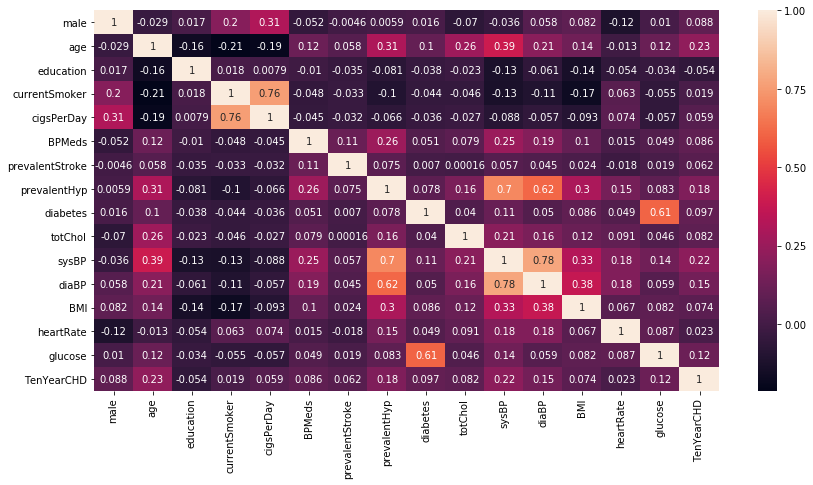

In [84]:
plt.figure(figsize=(14,7))
correlation = heart.corr()
sns.heatmap(correlation,annot=True)

In [101]:
heart.drop(['age_class','education','glucose'],axis=1,inplace=True)

# Predictive Analysis

In [102]:
X = heart.drop(['TenYearCHD'],axis=1)
y = heart['TenYearCHD']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [103]:
logreg = LogisticRegression(C=0.8)
logreg.fit(X_train,y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.84827044025157228

#### The dataset here is imbalanced. So,accuracy is not a appropriate metric to compare models.Hence,we'll employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [105]:
# Calculate null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.845912
Name: TenYearCHD, dtype: float64

#### The null accuracy is 84.5%. There is only a slight improvement in accuracy for our model from the baseline model

In [106]:
conf = metrics.confusion_matrix(y_test,y_pred)
print(conf)

[[1073    3]
 [ 190    6]]


Here, value of False Negative is quite high(190) which can be really harmful for the person's health as he/she is classified as healthy when in reality they are sick.
Our aim is to be able to detect the risk of heart disease more precisely even if we have to compromise on the false positives.

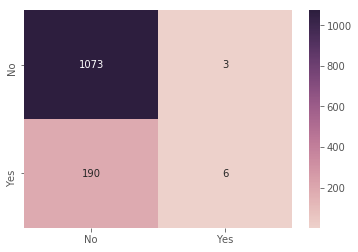

In [109]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True,fmt='d',cmap=cmap)

In [110]:
predict_prob = logreg.predict_proba(X_test)
fpr,tpr,_ = metrics.roc_curve(y_test,predict_prob[:,1])

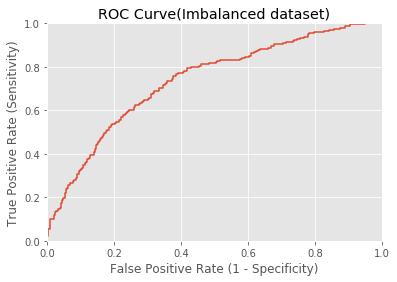

In [112]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve(Imbalanced dataset)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [113]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.735931


#### Let us retrain our data using logistic regression this time using a parameter called 'balanced' which would handle imbalance in the data by changing the threshold set by logistic regression model:

In [115]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [117]:
y_pred = logreg.predict(X_test)
pred_prob = logreg.predict_proba(X_test)

In [118]:
conf = metrics.confusion_matrix(y_test,y_pred)
print(conf)

[[760 316]
 [ 66 130]]


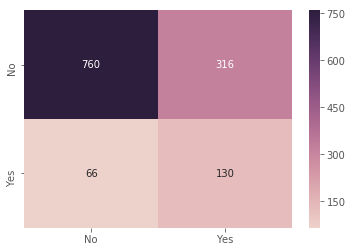

In [120]:
sns.heatmap(conf,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt='d',cmap=cmap)

In [124]:
fpr,tpr,_=roc_curve(y_test,pred_prob[:,1])

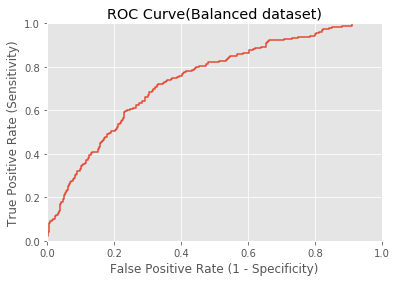

In [125]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve(Balanced dataset)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [126]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve(Balanced dataset) : %f" % roc_auc)

Area under the ROC curve(Balanced dataset) : 0.739383
